<a href="https://colab.research.google.com/github/domin00/polish_2023_election_analysis/blob/main/polish_elections_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 2023 Polish Election Analysis

In this notebook we will do some analysis on the results of the 2023 parlament elections that occured in Poland.

The motivation of this analysis was some major concerns prior to the elections taking place about the fairness of the distributions of mandates. As well as some other issues that this analysis will cover.

## Context

### Distribution of mandates
The mandates in Poland are distributed per voting regions, called 'Okręgi Wyborcze'. Ranging from 7 up to 20 mandates per voting region. Generally, the distribution of these mandates is supposed to be based on the number of voters in the given voting region. More voters means more mandates, and vice versa. This is obviously done in order to adjust the voting power of any one region, and create a fair democratic process.

It would clearly be absurd, if a region with a smaller voting base had a stronger impact on the general election than a region with a larger voting base.

Unfortunately, this is exactly what seems to be occuring in Poland right now. The last redistribution of the mandates in each of the voting regions occured 12 years ago. Since then the distribution of the population of Poland has significantly changed, with more people migrating to larger cities, or even abroad. Subsequently, many have voiced their concerns that the current distribution of mandates is no longer justified, and it might have even been taken advantage of by the former ruling party. If this were true, this would raise serious concerns on the political ethics of people involved, right?

Let's take a look at the data from the elections to get a better understanding of the larger picture.

In [ ]:
# read all the CSV files into pandas dataframes

# Define the file path
okregi_wyborcze = "/content/drive/MyDrive/election_data/okregi_sejm_utf8.csv"
wyniki_procent  = "/content/drive/MyDrive/election_data/wyniki_gl_na_listy_po_okregach_proc_sejm_utf8.csv"

# Load the CSV file into a DataFrame
okregi_df = pd.read_csv(okregi_wyborcze, delimiter=';')
wyniki_df = pd.read_csv(wyniki_procent, delimiter=';')

# Average number of votes needed per mandate

In the below section we will analyze the case of the distributed mandates per voting region and how much on average was required to win a single mandate in each of the regions.

Obviously it's impossible to create a situation where the number of votes required per mandate are equal across the board, so some variance will occurr and should be acceptable.

However, the major concern that should adressed, are situations where one of the regions deviates significantly from the general average. The problem with such an occurance is that, you are creating an undemocratic process, where the voice of certain groups of people are less valuable than of others.

This would be unacceptable.


## Methods

In order to explore these numbers, the data for each voting region was acessed. The data present the number of mandates per region, as well as the number of eligible voters in each region.

Based on these values an average was computed for each region, showcasing how many votes were required to win a single mandate in this region.
Additionally, the average of the entire population of Poland was computed. This allows to identify which regions were the ones where the votes were more valuable, and which were the ones with less valuable votes.

To clarify,
regions that had an average lower than that of the national average had votes that were more valuable.

# Results

Below you will see two tables.

The first lists the top 5 voting regions were your vote was the most valuable.

The one below lists the bottom 5 voting regions were your votes was the least valuable.


If you look closely, the voting region [Numer okręgu] 19, which is the voting region of the capital city of Warsaw, has some unusual numbers in its data. Most notably with a massive amount of votes required in order to win a single mandate.

In [ ]:
okregi_df.head()

,Numer okręgu,Liczba mandatów,Liczba list,Liczba kandydatów,Mieszkańcy,Wyborcy,Siedziba OKW,Opis granic,Liczba wyborcow na mandat
31,32,9,7,119,610295,499586,Katowice,część województwa śląskiego obejmująca obszary...,55509.555556
33,34,8,8,116,576370,449980,Elbląg,część województwa warmińsko-mazurskiego obejmu...,56247.500000
6,7,12,8,176,877849,684520,Chełm,część województwa lubelskiego obejmująca obsza...,57043.333333
8,9,10,7,130,686258,574427,Łódź,część województwa łódzkiego obejmująca obszary...,57442.700000
39,40,8,7,104,583587,459778,Koszalin,część województwa zachodniopomorskiego obejmu...,57472.250000


In [ ]:
okregi_df.tail()

,Numer okręgu,Liczba mandatów,Liczba list,Liczba kandydatów,Mieszkańcy,Wyborcy,Siedziba OKW,Opis granic,Liczba wyborcow na mandat
24,25,12,7,163,1000568,813135,Gdańsk,część województwa pomorskiego obejmująca obsza...,67761.250000
2,3,14,7,186,1202108,991398,Wrocław,część województwa dolnośląskiego obejmująca o...,70814.142857
38,39,10,6,118,866222,712724,Poznań,część województwa wielkopolskiego obejmująca o...,71272.400000
19,20,12,7,159,1127706,876706,Warszawa,część województwa mazowieckiego obejmująca obs...,73058.833333
18,19,20,7,262,1639667,1927793,Warszawa,część województwa mazowieckiego obejmująca obs...,96389.650000


In [ ]:
print(okregi_df.to_string(index=False))

 Numer okręgu  Liczba mandatów  Liczba list  Liczba kandydatów  Mieszkańcy  Wyborcy         Siedziba OKW                                                                                                                                                                                                                                                                Opis granic  Liczba wyborcow na mandat
           32                9            7                119      610295   499586             Katowice                                                                                                                     część województwa śląskiego obejmująca obszary powiatów: będziński, zawierciański oraz miast na prawach powiatu: Dąbrowa Górnicza, Jaworzno, Sosnowiec               55509.555556
           34                8            8                116      576370   449980               Elbląg                                                                    część województwa warmińsko-ma

In [ ]:
# Average number of votes per single parlament mandate

total_wyborcy = okregi_df['Wyborcy'].sum()
total_mandaty = okregi_df['Liczba mandatów'].sum()

mean_pop_per_mandat = total_wyborcy/total_mandaty

print('Średnia ilość potrzebnych głosów na uzyskanie jednego mandatu: ', round(mean_pop_per_mandat))


Średnia ilość potrzebnych głosów na uzyskanie jednego mandatu:  63243


In [ ]:
okregi_df['Liczba wyborcow na mandat'] = okregi_df['Wyborcy']/okregi_df['Liczba mandatów']

okregi_df = okregi_df.sort_values(by='Liczba wyborcow na mandat', ascending=True)

print(okregi_df[['Numer okręgu', 'Liczba wyborcow na mandat']].round().to_string(index=False))



 Numer okręgu  Liczba wyborcow na mandat
           32                    55510.0
           34                    56248.0
            7                    57043.0
            9                    57443.0
           40                    57472.0
           31                    57953.0
           35                    58101.0
           33                    58317.0
           17                    58618.0
            2                    58721.0
            1                    58780.0
           30                    58890.0
            5                    58985.0
           22                    59303.0
           10                    59381.0
            6                    59527.0
           14                    59598.0
           11                    60381.0
           18                    60486.0
           29                    60578.0
           21                    60868.0
            8                    60946.0
           12                    61060.0
            4   

Based on the above numbers displayed, something is clearly off.

How can a voting region with the highest number of voters, have the lowest value of their votes? And not only slightly lower, but lower by a HUGE margin, which screams "outlier".

Let's plot these values to make it a bit more clear how anomolous these results are...

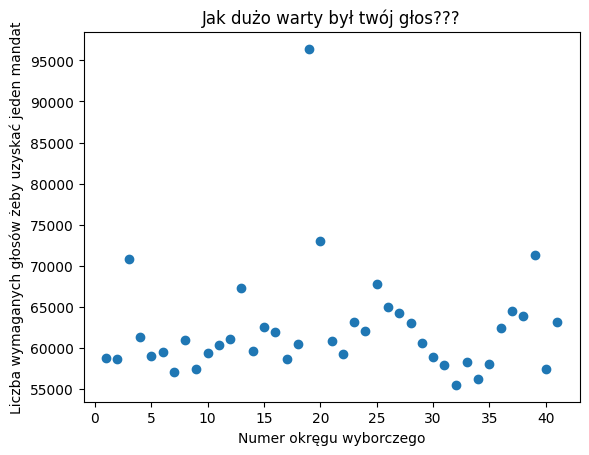

In [ ]:
x = okregi_df['Numer okręgu']
y = okregi_df['Liczba wyborcow na mandat']

# Create the scatter plot
plt.scatter(x, y)

# Set axis labels
plt.xlabel('Numer okręgu wyborczego')
plt.ylabel('Liczba wymaganych głosów żeby uzyskać jeden mandat')

# Set the title of the plot
plt.title('Jak dużo warty był twój głos???')

# Display the plot
plt.show()

In [ ]:
wyniki_df.head()


,Nr okręgu,Liczba komisji,Liczba uwzględnionych komisji,Frekwencja,Procent głosów nieważnych,W tym z powodu postawienia znaku „X” obok nazwiska dwóch lub większej liczby kandydatów z różnych list,W tym z powodu niepostawienia znaku „X” obok nazwiska żadnego kandydata,"W tym z powodu postawienia znaku „X” wyłącznie obok nazwiska kandydata na liście, której rejestracja została unieważniona",Procent głosów ważnych oddanych łącznie na wszystkie listy kandydatów,KOMITET WYBORCZY BEZPARTYJNI SAMORZĄDOWCY,...,KOMITET WYBORCZY NOWA LEWICA,KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ,KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ,KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI,KOMITET WYBORCZY POLSKA JEST JEDNA,KOMITET WYBORCZY WYBORCÓW RUCHU DOBROBYTU I POKOJU,KOMITET WYBORCZY NORMALNY KRAJ,KOMITET WYBORCZY ANTYPARTIA,KOMITET WYBORCZY RUCH NAPRAWY POLSKI,KOMITET WYBORCZY WYBORCÓW MNIEJSZOŚĆ NIEMIECKA
0,1,823,823,"71,45","1,95","58,86","41,14","0,00","98,05","3,34",...,"9,51","34,80","6,33","33,78","1,49",NaN,NaN,NaN,NaN,NaN
1,2,574,574,"69,14","1,92","65,32","34,68","0,00","98,08","1,80",...,"7,98","33,34","6,02","37,17","1,57",NaN,NaN,NaN,NaN,NaN
2,3,894,894,"78,06","1,20","54,29","45,71","0,00","98,80","2,89",...,"11,35","26,66","6,98","36,94","1,44",NaN,NaN,NaN,NaN,NaN
3,4,957,957,"73,04","1,95","61,07","38,93","0,00","98,05","1,67",...,"9,92","30,45","6,42","35,01","1,47",NaN,NaN,NaN,NaN,NaN
4,5,960,960,"70,52","2,20","54,96","36,26","8,79","97,80","1,44",...,"11,25","34,06","6,37","29,52","1,25","0,42",NaN,NaN,NaN,NaN


In [ ]:

# partie = wyniki_df.iloc[:, -12:]

# partie_float = partie.apply(lambda x: x.str.replace(',', '.').astype(float), axis=1)

# wygrany_okregu_df = wyniki_df
# wygrany_okregu_df['Wygrany okręgu'] = partie_float.idxmax(axis=1, skipna=True)

print(wygrany_okregu_df[['Nr okręgu', 'Wygrany okręgu']])
# print(partie.dtypes)

    Nr okręgu                                     Wygrany okręgu
0           1            KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ
1           2  KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELS...
2           3  KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELS...
3           4  KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELS...
4           5            KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ
5           6            KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ
6           7            KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ
7           8  KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELS...
8           9  KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELS...
9          10            KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ
10         11            KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ
11         12            KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ
12         13  KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELS...
13         14            KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ
14         15            

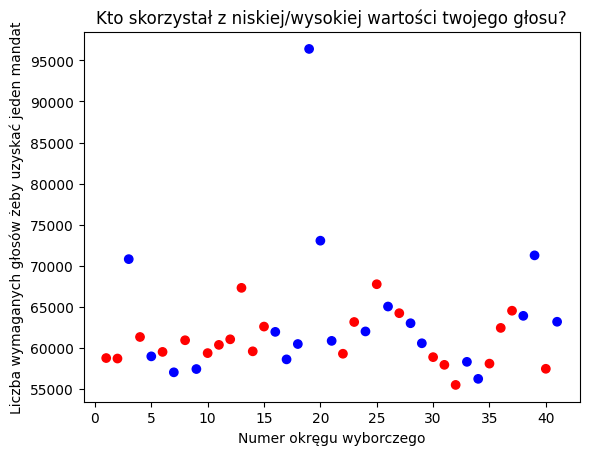

In [ ]:
color_mapping = {
    'KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI': 'blue',  # Specify the color for the first option
    'KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ': 'red'   # Specify the color for the second option
}

x = okregi_df['Numer okręgu']
y = okregi_df['Liczba wyborcow na mandat']

colors = wygrany_okregu_df['Wygrany okręgu'].map(color_mapping)

# Create the scatter plot
scatter = plt.scatter(x, y, c=colors)

# Set axis labels
plt.xlabel('Numer okręgu wyborczego')
plt.ylabel('Liczba wymaganych głosów żeby uzyskać jeden mandat')

# Set the title of the plot
plt.title('Kto skorzystał z niskiej/wysokiej wartości twojego głosu?')

# plt.legend(handles=[scatter], labels=['PiS', 'KO'], title='Legend')

# Display the plot
plt.show()

So, let's consider that the mandates are wrongly distributed in Warsaw.

How many mandates should Warsaw receive in order to match its voting power to the national average?

In [ ]:
avg_vote_power_warsaw = 96390.0
num_mandates_warsaw   = 20
avg_vote_power_poland = mean_pop_per_mandat

ratio = avg_vote_power_warsaw/avg_vote_power_poland

corrected_mandates_warsaw = ratio * num_mandates_warsaw

print(corrected_mandates_warsaw)

30.48259153383031


Based on the above calculations, in order for the voting region of Warsaw to match the national average, it should have 10 more mandates than it currently has.

10 additional mandates is a lot!

How would that impact the elections?

That's a great questions, which we will explore below.

Let's start with attempting to sensibly redistribute the mandates.

## Method

Based on the above visualization the only major outlier data point is that of Warsaw. Because of this, in order to simplify reordering the mandate distribution, the 10 voting regions with the highest voting power will have a single mandate removed, and those will be added to the Warsaw voting region.

Let's see how the distribution looks then.

In [ ]:
poprawione_okregi_df = okregi_df.copy()

poprawione_okregi_df = poprawione_okregi_df.reset_index(drop=True)

In [ ]:
poprawione_okregi_df.loc[:9, 'Liczba mandatów'] -= 1
poprawione_okregi_df.iloc[-1, poprawione_okregi_df.columns.get_loc('Liczba mandatów')] += 10

In [ ]:
poprawione_okregi_df['Liczba wyborcow na mandat'] = poprawione_okregi_df['Wyborcy']/poprawione_okregi_df['Liczba mandatów']

In [ ]:
okregi_df['Liczba mandatów'].sum()

460

In [ ]:
poprawione_okregi_df

,Numer okręgu,Liczba mandatów,Liczba list,Liczba kandydatów,Mieszkańcy,Wyborcy,Siedziba OKW,Opis granic,Liczba wyborcow na mandat
0,32,8,7,119,610295,499586,Katowice,część województwa śląskiego obejmująca obszary...,62448.250000
1,34,7,8,116,576370,449980,Elbląg,część województwa warmińsko-mazurskiego obejmu...,64282.857143
2,7,11,8,176,877849,684520,Chełm,część województwa lubelskiego obejmująca obsza...,62229.090909
3,9,9,7,130,686258,574427,Łódź,część województwa łódzkiego obejmująca obszary...,63825.222222
4,40,7,7,104,583587,459778,Koszalin,część województwa zachodniopomorskiego obejmu...,65682.571429
5,31,11,7,150,854693,695432,Katowice,część województwa śląskiego obejmująca obszar ...,63221.090909
6,35,9,7,134,741708,581013,Olsztyn,część województwa warmińsko-mazurskiego obejmu...,64557.000000
7,33,15,9,252,1166405,933071,Kielce,województwo świętokrzyskie,62204.733333
8,17,8,8,130,670809,527564,Radom,część województwa mazowieckiego obejmująca obs...,65945.500000
9,2,7,7,107,578649,469771,Wałbrzych,część województwa dolnośląskiego obejmująca ob...,67110.142857


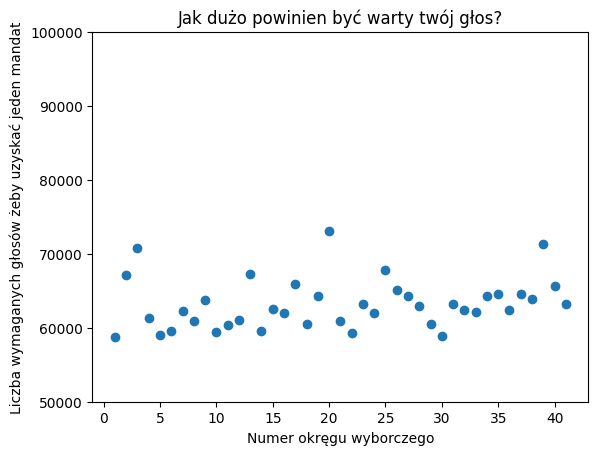

In [ ]:
x = poprawione_okregi_df['Numer okręgu']
y = poprawione_okregi_df['Liczba wyborcow na mandat']

# Create the scatter plot
plt.scatter(x, y)

# Set axis labels
plt.xlabel('Numer okręgu wyborczego')
plt.ylabel('Liczba wymaganych głosów żeby uzyskać jeden mandat')
plt.ylim(50000, 100000)

# Set the title of the plot
plt.title('Jak dużo powinien być warty twój głos?')

# Display the plot
plt.show()

The plot above showcases the distribution of a adjusted mandate distribution. Where the 10 voting regions with the highest voting power had a single mandate removed, and Warsaw with the lowest voting power region, had 10 added.

This distribution looks much more appropriate than the one above. Sure, there is still some variance, but it's significantly better distributed and could easily be considered a 'good' mandate distribution.

So given the new distribution of mandates produced above, how can we check what an impact this would have on the elections?

## Method

In order to analyze this possibility the current distribution of mandates amongst the candidate parties in each region will be used. However, now the distribution will be based on the updated numbers of mandates in each voting region.

In [ ]:
lista = "/content/drive/MyDrive/election_data/wykaz_list_sejm_utf8.csv"

lista_df = pd.read_csv(lista, delimiter=';')

In [ ]:
lista_df

,Numer okręgu,Nr listy,Nazwa Komitetu,Liczba kandydatów,Liczba głosów,Procent głosów oddanych w okręgu,Udział w podziale mandatów,Liczba mandatów
0,1,1,KOMITET WYBORCZY BEZPARTYJNI SAMORZĄDOWCY,23,16748,"3,34",Nie,0
1,1,2,KOALICYJNY KOMITET WYBORCZY TRZECIA DROGA POLS...,24,53958,"10,75",Tak,1
2,1,3,KOMITET WYBORCZY NOWA LEWICA,24,47715,"9,51",Tak,1
3,1,4,KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ,24,174643,"34,80",Tak,5
4,1,5,KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPOD...,24,31770,"6,33",Tak,0
...,...,...,...,...,...,...,...,...
298,41,4,KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ,24,159575,"28,79",Tak,4
299,41,5,KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPOD...,24,32942,"5,94",Tak,0
300,41,6,KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELS...,24,222427,"40,13",Tak,6
301,41,7,KOMITET WYBORCZY POLSKA JEST JEDNA,12,6218,"1,12",Nie,0


In [ ]:
df = lista_df.copy()

result_df = df.copy()

result_df = result_df[result_df['Liczba mandatów'] != 0]


In [ ]:
merged_df = pd.merge(result_df, poprawione_okregi_df[['Numer okręgu', 'Liczba mandatów']], left_on='Numer okręgu', right_on='Numer okręgu', how='inner')

merged_df

,Numer okręgu,Nr listy,Nazwa Komitetu,Liczba kandydatów,Liczba głosów,Procent głosów oddanych w okręgu,Udział w podziale mandatów,Liczba mandatów_x,Liczba mandatów_y
0,1,2,KOALICYJNY KOMITET WYBORCZY TRZECIA DROGA POLS...,24,53958,"10,75",Tak,1,12
1,1,3,KOMITET WYBORCZY NOWA LEWICA,24,47715,"9,51",Tak,1,12
2,1,4,KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ,24,174643,"34,80",Tak,5,12
3,1,6,KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELS...,24,169540,"33,78",Tak,5,12
4,2,2,KOALICYJNY KOMITET WYBORCZY TRZECIA DROGA POLS...,16,39215,"12,13",Tak,1,7
...,...,...,...,...,...,...,...,...,...
159,40,6,KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELS...,16,124625,"38,69",Tak,4,7
160,41,2,KOALICYJNY KOMITET WYBORCZY TRZECIA DROGA POLS...,24,69957,"12,62",Tak,1,12
161,41,3,KOMITET WYBORCZY NOWA LEWICA,24,52032,"9,39",Tak,1,12
162,41,4,KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ,24,159575,"28,79",Tak,4,12


In order to redistribute in each voting region the updated amount of mandates according to the voting results of the 2023 elections a statistical method needs to be used that categorizes the number of votes into parlament mandates.

This method is called the d'Hondt method. This method was implemented and used in order to reassign the redistributed number of mandates in each voting region accordingly, as they would be in a real election.

In [ ]:
# Apply the d'Hondt method to each group based on 'Numer okręgu'
result_df = merged_df.copy()

def dhondt_method(df):
    # Create a copy of the dataframe to avoid modifying the original one
    df_copy = df.copy()

    # Initialize a new column for the allocated seats
    df_copy['Poprawiona liczba mandatów'] = 0

    # Repeat the allocation process for the total number of seats
    for _ in range(int(df_copy['Liczba mandatów_y'].max())):
        # Find the party with the highest votes/seats ratio
        max_row = (df_copy['Liczba głosów'] / (df_copy['Poprawiona liczba mandatów'] + 1)).idxmax()

        # Allocate a seat to this party
        df_copy.loc[max_row, 'Poprawiona liczba mandatów'] += 1

    return df_copy

# Apply the d'Hondt method to each voting region in the dataframe
result_df = result_df.groupby('Numer okręgu').apply(dhondt_method).reset_index(drop=True)

result_df

<ipython-input-215-cf3cfdc5f5d7>:22: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  result_df = result_df.groupby('Numer okręgu').apply(dhondt_method).reset_index(drop=True)


,Numer okręgu,Nr listy,Nazwa Komitetu,Liczba kandydatów,Liczba głosów,Procent głosów oddanych w okręgu,Udział w podziale mandatów,Liczba mandatów_x,Liczba mandatów_y,Poprawiona liczba mandatów
0,1,2,KOALICYJNY KOMITET WYBORCZY TRZECIA DROGA POLS...,24,53958,"10,75",Tak,1,12,1
1,1,3,KOMITET WYBORCZY NOWA LEWICA,24,47715,"9,51",Tak,1,12,1
2,1,4,KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ,24,174643,"34,80",Tak,5,12,5
3,1,6,KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELS...,24,169540,"33,78",Tak,5,12,5
4,2,2,KOALICYJNY KOMITET WYBORCZY TRZECIA DROGA POLS...,16,39215,"12,13",Tak,1,7,1
...,...,...,...,...,...,...,...,...,...,...
159,40,6,KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELS...,16,124625,"38,69",Tak,4,7,3
160,41,2,KOALICYJNY KOMITET WYBORCZY TRZECIA DROGA POLS...,24,69957,"12,62",Tak,1,12,1
161,41,3,KOMITET WYBORCZY NOWA LEWICA,24,52032,"9,39",Tak,1,12,1
162,41,4,KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ,24,159575,"28,79",Tak,4,12,4


In [ ]:
results = result_df.groupby('Nazwa Komitetu')[['Liczba mandatów_x', 'Poprawiona liczba mandatów']].sum().rename(columns={'Liczba mandatów_x': 'Oryginalna liczba mandatów'})

results

,Oryginalna liczba mandatów,Poprawiona liczba mandatów
Nazwa Komitetu,,
KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI,157,158
KOALICYJNY KOMITET WYBORCZY TRZECIA DROGA POLSKA 2050 SZYMONA HOŁOWNI - POLSKIE STRONNICTWO LUDOWE,65,64
KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ,18,18
KOMITET WYBORCZY NOWA LEWICA,26,27
KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ,194,193


In [ ]:
sum = 460

result_dict_2 = (results / sum) * 100

result_dict_2

,Oryginalna liczba mandatów,Poprawiona liczba mandatów
Nazwa Komitetu,,
KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI,34.130435,34.347826
KOALICYJNY KOMITET WYBORCZY TRZECIA DROGA POLSKA 2050 SZYMONA HOŁOWNI - POLSKIE STRONNICTWO LUDOWE,14.130435,13.913043
KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ,3.913043,3.913043
KOMITET WYBORCZY NOWA LEWICA,5.652174,5.869565
KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ,42.173913,41.956522


Based on these calculations and transformations, the imbalance of the mandate distributions had no effect on the outcome of these elections.

The change in distributions led to a minute change of only 2 seats in mandate winnings.

Thus, concluding that, while the redistribution of mandates is a fair action in order to make the election process more democratic, it did not alter the outcome of the election in a major way. The difference can be assumed to be negligible. Although one could argue that a shift of even a single seat has an impact, and it sure does, it does not implicate any unethical or undemocratic events.

